# 数组的排序

In [1]:
import numpy as np

In [2]:
# 选择排序
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [4]:
# bogo-sort
def bogo_sort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [5]:
x = np.array([2, 1, 4, 3, 5])
bogo_sort(x)

array([1, 2, 3, 4, 5])

## 1. NumPy中的快速排序：np.sort和np.argsort

尽管 `Python` 有内置的 `sort` 和 `sorted` 函数可以对列表进行排序，但是这里不会介绍这两个函数，因为 `NumPy` 的 `np.sort` 函数实际上效率更高。  
默认情况下，`np.sort` 的排序算法是**快速排序**，其算法复杂度为`O[N log N]`，另外也可以选择**归并排序**和**堆排序**。  
对于大多数应用场景，默认的快速排序已经足够高效了。

In [6]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)  # 如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用 np.sort

array([1, 2, 3, 4, 5])

In [7]:
x.sort()    # 如果希望用排好序的数组替代原始数组，可以使用数组的 sort 方法
print(x)

[1 2 3 4 5]


In [8]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)  # argsort函数返回的是原始数组排好序的索引值
print(i)

[1 0 3 2 4]


In [9]:
# 上面argsort函数返回的索引值可以被用于（通过花哨的索引）创建有序的数组
x[i]

array([1, 2, 3, 4, 5])

### 1.1. 沿着行或列排序

需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将会丢失！

In [10]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [11]:
np.sort(X, axis=0)  # 对X的每一列排序

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
np.sort(X, axis=1)  # 对X的每一行排序

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## 2. 部分排序：分隔

有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第 K 小的值，`NumPy` 的 `np.partition` 函数提供了该功能。  
`np.partition` 函数的输入是数组和数字 K，输出结果是一个新数组，最左边是第 K 小的值，往右是任意顺序的其他值。

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

# 请注意，结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值。在这两个分隔区间中，元素都是任意排列的。

array([2, 1, 3, 4, 6, 5, 7])

In [14]:
np.partition(X, 2, axis=1)  # 与排序类似，也可以沿着多维数组任意的轴进行分隔

# 输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分布在剩下的位置。

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## 3. 示例：K个最近邻

以下示例展示的是如何利用 `argsort` 函数沿着多个轴快速找到集合中每个点的最近邻。  
首先，在二维平面上创建一个有 10 个随机点的集合。按照惯例，将这些数据点放在一个 `10×2` 的数组中：

In [15]:
X = rand.rand(10, 2)

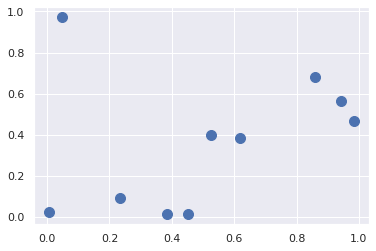

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0], X[:,1], s=100)

现在来计算两两数据点对间的距离。利用 `NumPy` 的广播和聚合功能，可以用一行代码计算矩阵的平方距离：

In [17]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

分解上面各组件后再分析

In [18]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [19]:
# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [20]:
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [21]:
# 请再次确认以上步骤，应该看到该矩阵的对角线（也就是每个点到其自身的距离）的值都是 0
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

当我们有了这样一个转化为两点间的平方距离的矩阵后，就可以使用 `np.argsort` 函数沿着每行进行排序了。最左边的列给出的索引值就是最近邻。  
需要注意的是，第一列是按 0~9 从小到大排列的。这是因为每个点的最近邻是其自身，所以结果也正如我们所想。

In [22]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


如果使用全排序，我们实际上可以实现的比这个例子展示的更多。  
如果我们仅仅关心 k 个最近邻，那么唯一需要做的是分隔每一行，这样最小的 k + 1 的平方距离将排在最前面，其他更长的距离占据矩阵该行的其他位置。  
可以用 `np.argpartition` 函数实现：

In [23]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

为了将邻节点网络可视化，我们将每个点和其最近的两个最近邻连接。

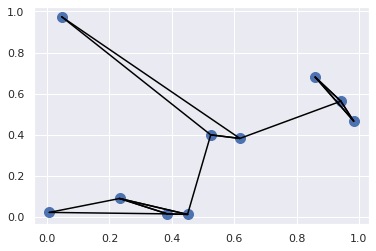

In [25]:
plt.scatter(X[:,0], X[:,1], s=100)
# 将每个点与它两个最近邻连接
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现
        plt.plot(*zip(X[j], X[i]), color='black')